In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('..\Initial_data\K5F6x\K5F6_cor.csv', ";")
df

,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,4.062769,4.189256,12.694500,4.173750,1.531687,312.2457,-40.84609,-40.91484,38.29781,56.14094,...,149.8657,3.997919,97.84505,0.784133,17.62373,97.57354,0.858941,100.0,473.6719,15.01167
1,4.064288,4.190306,12.363750,4.173750,1.090688,312.2536,-39.48359,-38.33828,38.86625,57.16969,...,149.8093,3.998653,97.87302,0.746275,17.64795,97.48631,0.858940,100.0,475.4792,15.07297
2,4.065131,4.191300,12.375560,4.232812,1.289531,312.2162,-39.93906,-40.55938,38.43406,55.34781,...,149.8367,4.000594,97.87021,0.782694,17.59481,97.51240,0.863575,100.0,472.8542,15.07193
3,4.065431,4.192444,13.810780,4.681688,2.695219,312.2260,-40.66797,-40.74062,38.63844,54.76594,...,149.9457,4.004294,97.85599,0.768589,17.54865,97.53047,0.867372,100.0,471.4688,15.02687
4,4.066875,4.192631,13.858030,5.067563,2.718844,312.2950,-40.02266,-39.07109,37.64219,56.70219,...,150.0039,4.006975,97.85573,0.783937,17.46280,97.54729,0.861497,100.0,469.8177,15.14182
5,4.065413,4.191056,13.562720,4.301719,1.413563,312.3560,-38.33125,-38.66094,38.32625,57.14094,...,149.9904,4.009881,97.85740,0.771780,17.51972,97.51328,0.861802,100.0,470.7917,15.02474
6,4.064756,4.190025,12.964220,4.941563,1.929375,312.3264,-40.11406,-40.21016,38.61188,57.39000,...,149.8661,4.012119,97.87286,0.761173,17.45629,97.52318,0.860350,100.0,467.4479,15.16224
7,4.064250,4.189669,12.227910,4.075313,1.884094,312.3363,-38.40781,-40.42500,38.53531,56.82312,...,149.9027,4.011381,97.85917,0.782816,17.44340,97.51729,0.858879,100.0,471.3854,15.01458
8,4.062975,4.188431,12.192470,4.467094,1.358438,312.3560,-39.92109,-40.15781,38.28812,57.45594,...,149.8751,4.008956,97.86693,0.792897,17.54460,97.50813,0.864812,100.0,472.1406,15.15031
9,4.062975,4.188356,12.554720,4.118625,2.077031,312.2930,-40.55469,-40.25312,38.62687,55.69938,...,149.8815,4.008156,97.85031,0.763887,17.45611,97.58443,0.860329,100.0,472.8646,14.95260


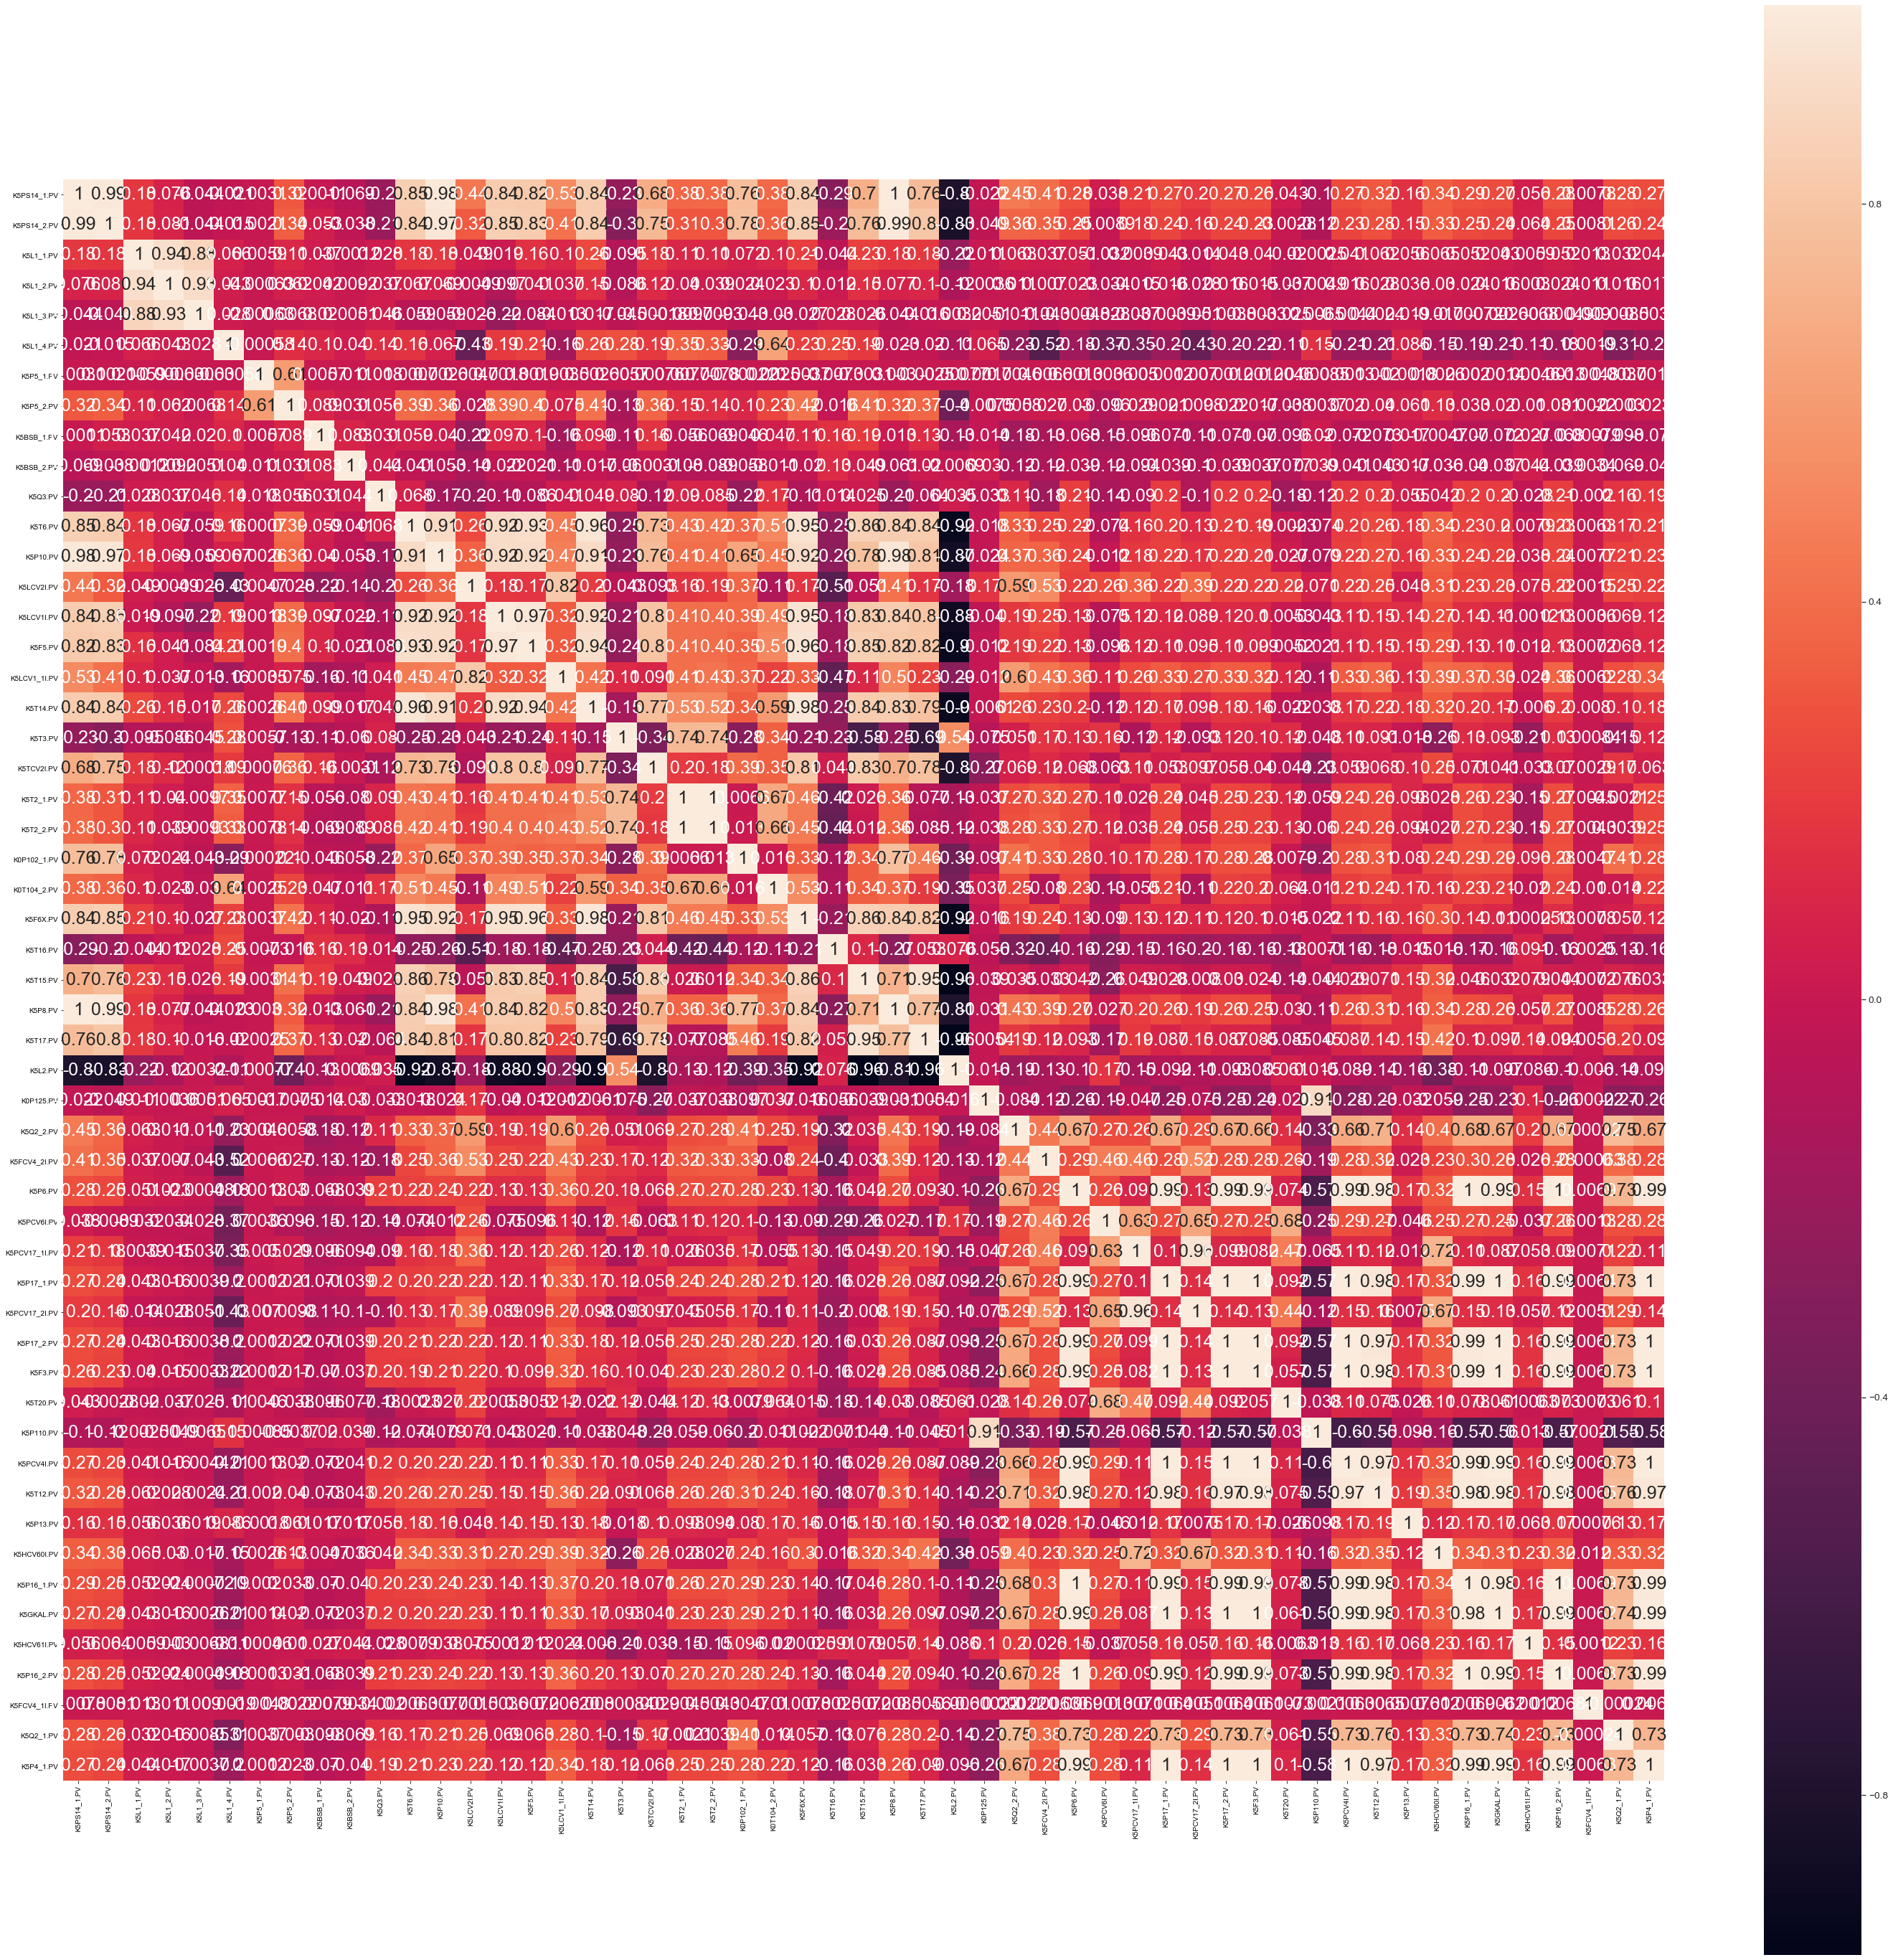

In [5]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [9]:
df = pd.read_csv('..\Initial_data\K5F6x\K5F6x.csv', ";")
df

,K5T6.PV,K5P10.PV,K5LCV1I.PV,K5F5.PV,K5T14.PV,K5F6X.PV
0,178.5525,4.269656,56.25938,39.62739,366.4125,34.59420
1,178.4763,4.267812,55.90813,39.69434,366.3244,34.52615
2,178.4650,4.264313,55.71375,39.61730,366.1294,34.44974
3,178.5375,4.274250,56.23125,39.62203,366.2794,34.37781
4,178.5788,4.277094,56.23563,39.53858,366.3619,34.29280
5,178.4075,4.253031,55.68156,39.49619,365.9644,34.28684
6,178.3737,4.243093,55.68687,39.35900,365.7150,34.08244
7,178.5788,4.277656,56.23438,39.52297,366.5063,33.96164
8,178.3600,4.248937,55.69281,39.43936,365.7787,33.93541
9,178.3663,4.251219,56.92375,40.34089,365.5669,33.74514


In [10]:
df=df.dropna()
df=df.round(4)
df=df.drop_duplicates(["K5T6.PV"])
df=df.drop_duplicates(["K5P10.PV"])
df=df.drop_duplicates(["K5LCV1I.PV"])
df=df.drop_duplicates(["K5F5.PV"])
df=df.drop_duplicates(["K5T14.PV"])
df=df.drop_duplicates(["K5F6X.PV"])
df 

,K5T6.PV,K5P10.PV,K5LCV1I.PV,K5F5.PV,K5T14.PV,K5F6X.PV
0,178.5525,4.2697,56.2594,39.6274,366.4125,34.5942
1,178.4763,4.2678,55.9081,39.6943,366.3244,34.5262
2,178.4650,4.2643,55.7138,39.6173,366.1294,34.4497
3,178.5375,4.2742,56.2312,39.6220,366.2794,34.3778
4,178.5788,4.2771,56.2356,39.5386,366.3619,34.2928
5,178.4075,4.2530,55.6816,39.4962,365.9644,34.2868
6,178.3737,4.2431,55.6869,39.3590,365.7150,34.0824
8,178.3600,4.2489,55.6928,39.4394,365.7787,33.9354
9,178.3663,4.2512,56.9238,40.3409,365.5669,33.7451
10,178.6113,4.2883,56.2203,39.4513,366.5325,33.7403


In [11]:
y = df.drop(['K5T6.PV', 'K5P10.PV', 'K5LCV1I.PV', 'K5F5.PV', 'K5T14.PV'], axis=1)
x = df.drop(['K5F6X.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [12]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9812322885123153

In [14]:
import pickle
filename = '../model/K5F6x.sav'
pickle.dump(clf, open(filename, 'wb'))